In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import os
import warnings
warnings.filterwarnings('ignore')
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [3]:
#Loading the dataset
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")


In [4]:
df.head(20)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


DATA PREPROCESSING

In [7]:
#Checking for null values
df.isnull().sum().sum()

0

In [8]:
#Checking for duplicated 
df.duplicated().sum()

24206

In [9]:
#Drop duplicate rows
df.drop_duplicates(inplace = True)
df.shape

(229474, 22)

In [10]:
df['Diabetes'] = df['Diabetes_binary']
df.drop(columns = 'Diabetes_binary', inplace=True)

In [11]:
# Value count for each value
for i in df.columns:
    print(i,'\n',df[i].value_counts())
    print('-'*90)

HighBP 
 0.0    125214
1.0    104260
Name: HighBP, dtype: int64
------------------------------------------------------------------------------------------
HighChol 
 0.0    128129
1.0    101345
Name: HighChol, dtype: int64
------------------------------------------------------------------------------------------
CholCheck 
 1.0    220176
0.0      9298
Name: CholCheck, dtype: int64
------------------------------------------------------------------------------------------
BMI 
 27.0    21514
26.0    17775
24.0    16497
28.0    14914
25.0    14793
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: BMI, Length: 84, dtype: int64
------------------------------------------------------------------------------------------
Smoker 
 0.0    122585
1.0    106889
Name: Smoker, dtype: int64
------------------------------------------------------------------------------------------
Stroke 
 0.0    219190
1.0     10284
Name: Stroke, dtype: int64
-------------------

In [12]:
#Change dtype to int
df = df.astype('int32')

EDA
Find correlation between the variables and the target variable (Diabetes_binary)

<Axes: >

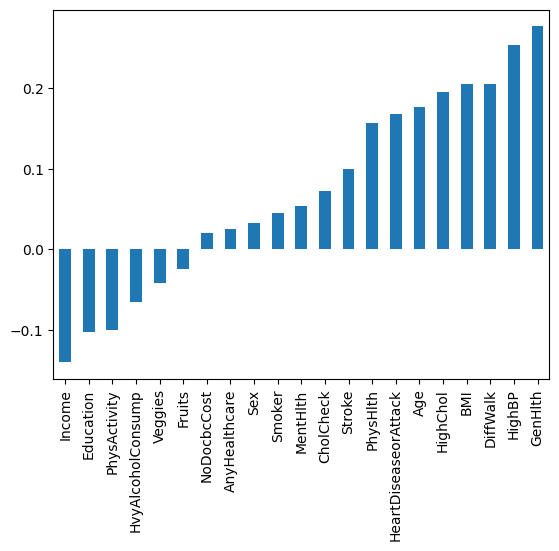

In [13]:
#Plot correlation between the variables and Diabetes_binary
df.corr()['Diabetes'][:-1].sort_values().plot(kind='bar')

 The x-axis represents the variables (excluding 'Diabetes'), and the y-axis represents the correlation values. 
 Positive correlations will have bars pointing to the right, negative correlations will have bars pointing to the left, and the length of the bars indicates the strength of the correlation.

Diabetes Percentage

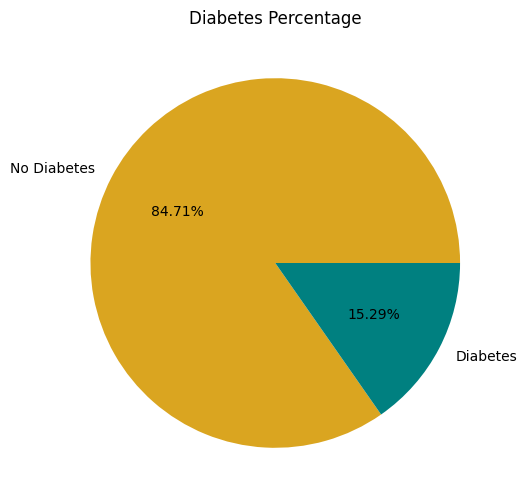

In [14]:
#Plot pie chart to show HeartDisease Percentage
plt.figure(figsize=(10,6)) # Set the figure size
# Create a pie chart using value counts of 'Diabetes' column
# The labels parameter specifies the label for each slice
# The autopct parameter adds percentage labels to each slice
# The colors parameter sets the colors for the slices
plt.pie(df['Diabetes'].value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.2f%%', colors=['goldenrod', 'teal'])
plt.title('Diabetes Percentage') # Set the title of the pie chart
plt.show()# Display the pie chart

Age and Diabetes

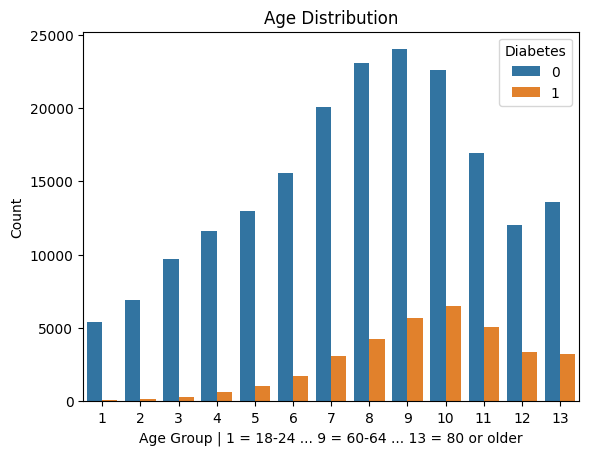

In [16]:
# Age group distribution
sns.countplot(x='Age', data=df, hue='Diabetes')
# Create a count plot using 'Age' as the x-axis, 'Diabetes' as the hue (differentiated by color)
plt.title('Age Distribution')
plt.xlabel('Age Group | 1 = 18-24 ... 9 = 60-64 ... 13 = 80 or older')# Set the x-axis label
plt.ylabel('Count') # Set the y-axis label
plt.show()# Display the count plot